## 6.1.4: Generate Random Latitudes and Longitudes

In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

## 6.1.5: Generate Random World Cities

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

## 6.2.6: Get the City Weather Data

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url)

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | palmer
Processing Record 5 of Set 1 | rosetta
Processing Record 6 of Set 1 | vanimo
Processing Record 7 of Set 1 | tadine
Processing Record 8 of Set 1 | flinders
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 13 of Set 1 | swan hill
Processing Record 14 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 15 of Set 1 | codrington
Processing Record 16 of Set 1 | fortuna
Processing Record 17 of Set 1 | geraldton
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | san policarpo
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | new norfolk

Processing Record 34 of Set 4 | tabas
Processing Record 35 of Set 4 | sioux lookout
Processing Record 36 of Set 4 | umm durman
City not found. Skipping...
Processing Record 37 of Set 4 | chepareria
Processing Record 38 of Set 4 | maloyaz
City not found. Skipping...
Processing Record 39 of Set 4 | esperance
Processing Record 40 of Set 4 | vila franca do campo
Processing Record 41 of Set 4 | garmsar
Processing Record 42 of Set 4 | olga
Processing Record 43 of Set 4 | anchorage
Processing Record 44 of Set 4 | xining
Processing Record 45 of Set 4 | sabang
Processing Record 46 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 47 of Set 4 | ponta delgada
Processing Record 48 of Set 4 | conakry
Processing Record 49 of Set 4 | catalina foothills
Processing Record 50 of Set 4 | marcona
City not found. Skipping...
Processing Record 1 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 2 of Set 5 | faanui
Processing Record 3 of Set 5 | shelburne
Processing

Processing Record 20 of Set 8 | villaviciosa
Processing Record 21 of Set 8 | kunda
Processing Record 22 of Set 8 | velke mezirici
Processing Record 23 of Set 8 | raudeberg
Processing Record 24 of Set 8 | catuday
Processing Record 25 of Set 8 | mokhotlong
Processing Record 26 of Set 8 | bodden town
Processing Record 27 of Set 8 | verkh-usugli
Processing Record 28 of Set 8 | amderma
City not found. Skipping...
Processing Record 29 of Set 8 | kilindoni
Processing Record 30 of Set 8 | henties bay
Processing Record 31 of Set 8 | surany
Processing Record 32 of Set 8 | lolua
City not found. Skipping...
Processing Record 33 of Set 8 | isangel
Processing Record 34 of Set 8 | sitio novo do tocantins
Processing Record 35 of Set 8 | tungkang
City not found. Skipping...
Processing Record 36 of Set 8 | iralaya
Processing Record 37 of Set 8 | kermanshah
Processing Record 38 of Set 8 | moussoro
Processing Record 39 of Set 8 | pemberton
Processing Record 40 of Set 8 | thunder bay
Processing Record 41 o

Processing Record 6 of Set 12 | lobito
Processing Record 7 of Set 12 | kentau
Processing Record 8 of Set 12 | tarko-sale
Processing Record 9 of Set 12 | piopio
Processing Record 10 of Set 12 | bucerias
Processing Record 11 of Set 12 | arlit
Processing Record 12 of Set 12 | blois
Processing Record 13 of Set 12 | klaksvik
Processing Record 14 of Set 12 | yatsuo
Processing Record 15 of Set 12 | zhigansk
Processing Record 16 of Set 12 | capinopolis
Processing Record 17 of Set 12 | farsund
Processing Record 18 of Set 12 | lavrentiya
Processing Record 19 of Set 12 | mayo
Processing Record 20 of Set 12 | nizhniy baskunchak
Processing Record 21 of Set 12 | biak
Processing Record 22 of Set 12 | jiddah
City not found. Skipping...
Processing Record 23 of Set 12 | boguchany
Processing Record 24 of Set 12 | gollere
City not found. Skipping...
Processing Record 25 of Set 12 | bambous virieux
Processing Record 26 of Set 12 | quatre cocos
Processing Record 27 of Set 12 | sandwick
Processing Record 28 

## 6.2.7: Create a DataFrame of City Weather Data

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,71.02,46,20,3.00,AU,2021-11-02 01:09:46
1,Albany,42.6001,-73.9662,43.54,70,100,5.88,US,2021-11-02 01:09:46
2,Busselton,-33.6500,115.3333,63.05,58,36,15.73,AU,2021-11-02 01:09:47
3,Palmer,42.1584,-72.3287,45.91,80,75,0.00,US,2021-11-02 01:09:47
4,Rosetta,31.4044,30.4164,70.38,69,57,8.79,EG,2021-11-02 01:09:48
5,Vanimo,-2.6741,141.3028,85.59,63,100,2.46,PG,2021-11-02 01:09:48
6,Tadine,-21.5500,167.8833,73.60,56,29,16.06,NC,2021-11-02 01:09:49
7,Flinders,-34.5833,150.8552,76.21,62,8,10.56,AU,2021-11-02 01:09:49
8,Hermanus,-34.4187,19.2345,53.91,70,70,9.62,ZA,2021-11-02 01:09:49
9,Rikitea,-23.1203,-134.9692,72.61,67,100,12.17,PF,2021-11-02 01:09:50


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
new_city_data_df = city_data_df[new_column_order]
new_city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2021-11-02 01:09:46,-42.8794,147.3294,71.02,46,20,3.00
1,Albany,US,2021-11-02 01:09:46,42.6001,-73.9662,43.54,70,100,5.88
2,Busselton,AU,2021-11-02 01:09:47,-33.6500,115.3333,63.05,58,36,15.73
3,Palmer,US,2021-11-02 01:09:47,42.1584,-72.3287,45.91,80,75,0.00
4,Rosetta,EG,2021-11-02 01:09:48,31.4044,30.4164,70.38,69,57,8.79
5,Vanimo,PG,2021-11-02 01:09:48,-2.6741,141.3028,85.59,63,100,2.46
6,Tadine,NC,2021-11-02 01:09:49,-21.5500,167.8833,73.60,56,29,16.06
7,Flinders,AU,2021-11-02 01:09:49,-34.5833,150.8552,76.21,62,8,10.56
8,Hermanus,ZA,2021-11-02 01:09:49,-34.4187,19.2345,53.91,70,70,9.62
9,Rikitea,PF,2021-11-02 01:09:50,-23.1203,-134.9692,72.61,67,100,12.17


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## 6.3.1: Plot Latitude vs. Temperature

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

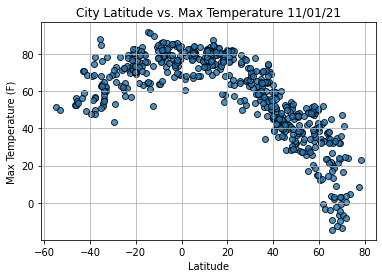

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

## 6.3.2: Plot Latitude vs. Humidity

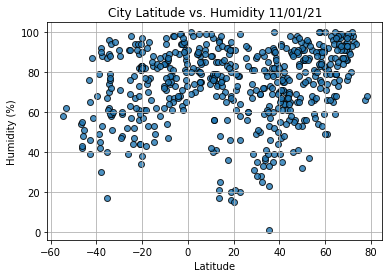

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

## 6.3.3: Plot Latitude vs. Humidity

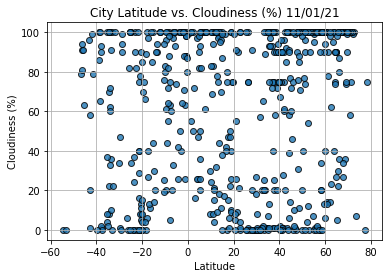

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

## 6.3.4: Plot Latitude vs. Wind Speed

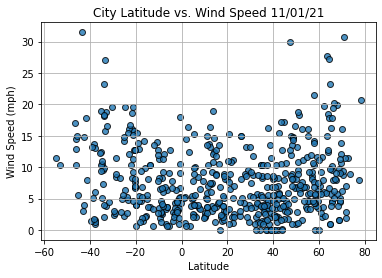

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

## 6.4.2: Find the Correlation Between Latitude and Maximum Temperature

In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
index13 = city_data_df.loc[13]
index13

City                    Geraldton
Lat                      -28.7667
Lng                         114.6
Max Temp                    64.81
Humidity                       48
Cloudiness                     90
Wind Speed                   11.5
Country                        AU
Date          2021-11-02 01:09:52
Name: 13, dtype: object

In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Albany,42.6001,-73.9662,43.54,70,100,5.88,US,2021-11-02 01:09:46
3,Palmer,42.1584,-72.3287,45.91,80,75,0.00,US,2021-11-02 01:09:47
4,Rosetta,31.4044,30.4164,70.38,69,57,8.79,EG,2021-11-02 01:09:48
12,Fortuna,40.5982,-124.1573,59.41,66,75,0.00,US,2021-11-02 01:09:51
15,San Policarpo,12.1791,125.5072,81.36,85,100,13.73,PH,2021-11-02 01:09:53


In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

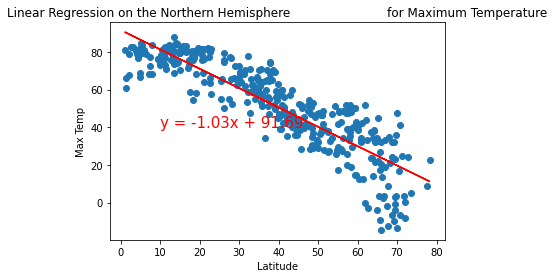

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

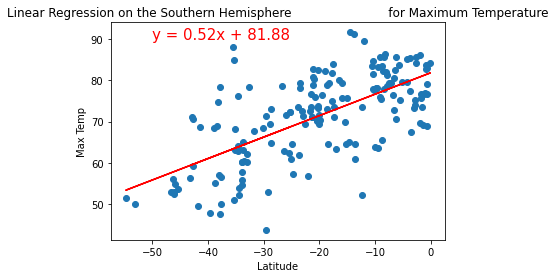

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

## 6.4.3: Find the Correlation Between Latitude and Percent Humidity

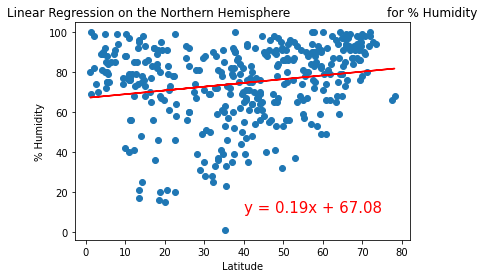

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

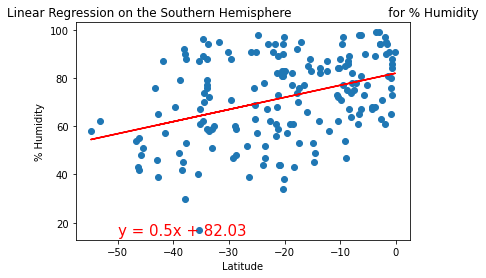

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

## 6.4.4: Find the Correlation Between Latitude and Percent Cloudiness

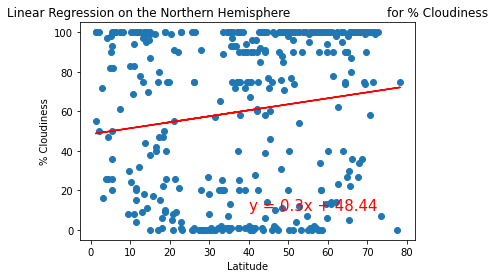

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

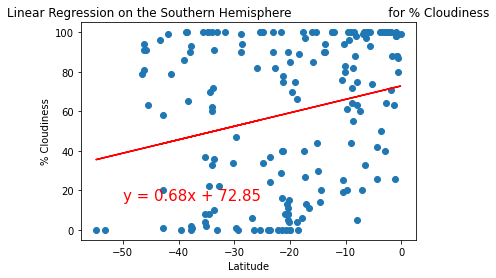

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

## 6.4.5: Find the Correlation Between Latitude and Wind Speed

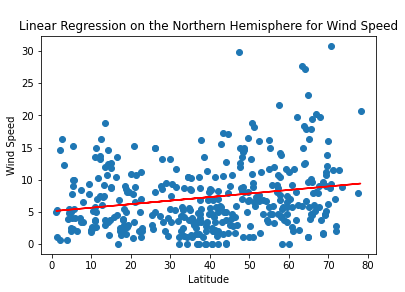

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

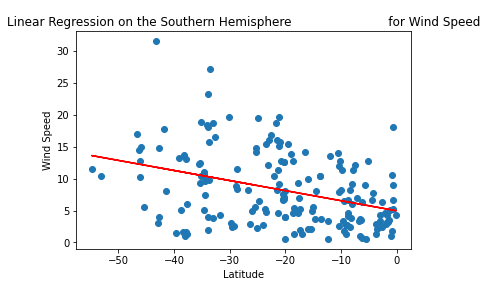

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))